#Analyzing Text Data
## Load relevent Packages

In [1]:
# Import spacy
import spacy

# Loading NLTK module
import nltk

# downloading punkt
nltk.download('punkt')

# downloading stopwords
nltk.download('stopwords')

# downloading omw-1.4
nltk.download('omw-1.4')

# downloading wordnet
nltk.download('wordnet')

# downloading average_perception_tagger
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Tokenization

In [2]:
# Sentence Tokenization
from nltk.tokenize import sent_tokenize

paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

tokenized_sentences=sent_tokenize(paragraph) # nltk에서 sent_toeknize()로 문단 -> 문장으로 tokenize
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


In [4]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

# Append the sentencizer pipe to the nlp pipeline
nlp.add_pipe('sentencizer') # spacy는 pipeline을 생성해서 실행하는 방식

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
nlp_doc = nlp(paragraph)

# Generate list of tokenized sentence
tokenized_sentences = []
for sentence in nlp_doc.sents:
    tokenized_sentences.append(sentence.text)
print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


In [6]:
# Import nltk word_tokenize method
from nltk.tokenize import word_tokenize

# Split paragraph into words
tokenized_words=word_tokenize(paragraph) # 문장->단어, word_tokenize()
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [7]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)

# tokenize paragraph into words
tokenized_words = []
for token in my_doc:
    tokenized_words.append(token.text)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [8]:
# Import frequency distribution
from nltk.probability import FreqDist

# Find frequency distribution of paragraph
fdist = FreqDist(tokenized_words)

# Check top 5 common words
fdist.most_common(5)

[('of', 4), ('the', 3), ('.', 3), ('Mahal', 2), ('is', 2)]

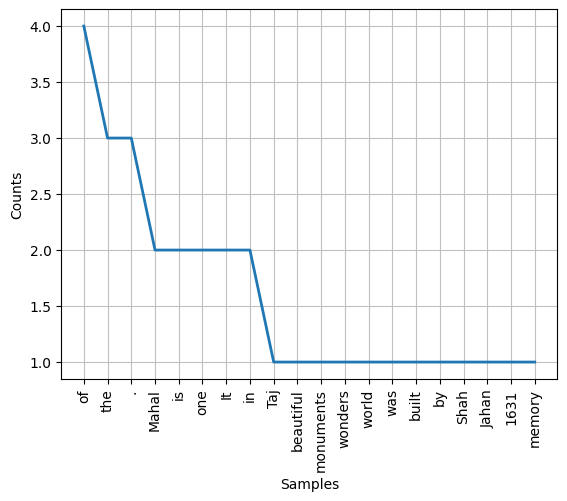

In [9]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

## Stopwords

In [12]:
# import the nltk stopwords
from nltk.corpus import stopwords

# Load english stopwords list
stopwords_set=set(stopwords.words("english")) # 영어에서의 stopword 확인

print(stopwords_set)

{'ll', "isn't", 'about', 'or', 'on', 'm', 'once', 'don', 'these', 'where', 'and', 'if', "wouldn't", 'are', 'was', 'more', 'aren', 'weren', "she's", 'here', "that'll", 'when', 'other', 'won', "hasn't", 'hers', 'wouldn', 'at', 'why', 'themselves', 'wasn', 'do', 'against', 'so', 'your', 'how', 'mustn', 'having', 'o', 'doing', 'into', 'the', 'while', 'than', 'as', 'ain', 'through', 'it', 'no', 'his', 're', 'after', 'himself', "mustn't", "you'll", 'them', 'most', 'out', 'until', 'being', 'each', 'by', "couldn't", 'ourselves', 'yourself', 'all', 'should', 'i', 'is', 'from', 've', 'ours', 'does', "haven't", 'he', 'of', 'its', 'up', "don't", 'very', 't', "you've", 'hasn', 'ma', 'for', 'own', "weren't", 'my', 'what', 'she', 'that', 'with', 'can', 'shouldn', 'am', 'an', 'any', "doesn't", 'our', "won't", 'because', 'yours', 'nor', 'some', 'will', 'been', 'herself', 'doesn', 'hadn', 'now', 'whom', 'same', "you'd", 'me', 'have', 'did', 'further', 'which', 'there', 'just', "shouldn't", 'off', 'over'

In [13]:
# Removing stopwords from text
filtered_word_list=[]
for word in tokenized_words:
    # filter stopwords
    if word not in stopwords_set: # stop word가 아닌 경우 list에 추가
        filtered_word_list.append(word)

# print tokenized words
print("Tokenized Word List:", tokenized_words)

# print filtered words
print("Filtered Word List:", filtered_word_list)

Tokenized Word List: ['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']
Filtered Word List: ['Taj', 'Mahal', 'one', 'beautiful', 'monuments', '.', 'It', 'one', 'wonders', 'world', '.', 'It', 'built', 'Shah', 'Jahan', '1631', 'memory', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [15]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

# text paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)

# Removing stopwords from text
filtered_token_list=[]
for token in my_doc:
    # filter stopwords
    if token.is_stop==False: # metadata에서 stopword인지 알 수 있음
        filtered_token_list.append(token)

print("Filtered Word List:",filtered_token_list)

Filtered Word List: [Taj, Mahal, beautiful, monuments, ., wonders, world, ., built, Shah, Jahan, 1631, memory, beloved, wife, Mumtaj, Mahal, .]


## Stemming and Lemmatization

In [16]:
# Import Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer

# Create lemmatizer object
lemmatizer = WordNetLemmatizer()

# Import Porter Stemmer
from nltk.stem.porter import PorterStemmer

# Create stemmer object
stemmer = PorterStemmer()

# take a sample word
sample_word = "crying"

print("Lemmatized Sample Word:", lemmatizer.lemmatize(sample_word,"v"))

print("Stemmed Sample Word:", stemmer.stem(sample_word))

Lemmatized Sample Word: cry
Stemmed Sample Word: cri


In [17]:
# Loading english language model
nlp = spacy.load("en_core_web_sm")

# Create nlp Object to handle linguistic annotations in documents.
words = nlp("cry cries crying")

# Find lemmatized word
for w in words:
    print('Original Word: ', w.text)
    print('Lemmatized Word: ',w.lemma_)

Original Word:  cry
Lemmatized Word:  cry
Original Word:  cries
Lemmatized Word:  cry
Original Word:  crying
Lemmatized Word:  cry


## PoS Tagging

In [19]:
# import Word Tokenizer and Pos Tagger
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Sample sentence
sentence = "Taj Mahal is one of the beautiful monument."

# Tokenize the sentence
sent_tokens = word_tokenize(sentence)

# Create PoS tags
sent_pos = pos_tag(sent_tokens) # tagging

# Print tokens with PoS
print(sent_pos)

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN'), ('.', '.')]


In [20]:
# Loading small english language model
nlp = spacy.load("en_core_web_sm")

# Create nlp Object to handle linguistic annotations in a documents.
sentence = nlp(u"Taj Mahal is one of the beautiful monument.")

for token in sentence:
    print(token.text, token.pos_)

Taj PROPN
Mahal PROPN
is AUX
one NUM
of ADP
the DET
beautiful ADJ
monument NOUN
. PUNCT


## Entity Recognition

In [21]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Sample paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in documents.
docs=nlp(paragraph)

entities=[(i.text, i.label_) for i in docs.ents]
print(entities)

[('Taj Mahal', 'PERSON'), ('Shah Jahan', 'ORG'), ('1631', 'DATE'), ('third', 'ORDINAL'), ('Mumtaj Mahal', 'PERSON')]


In [22]:
# Import display for visualizing the Entities
from spacy import displacy
 # Visualize the entities using render function
displacy.render(docs, style = "ent",jupyter = True)

## Dependency Parsing

In [23]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Sample sentence
sentence="Taj Mahal is one of the beautiful monument."

# Create nlp Object to handle linguistic annotations in a documents.
docs=nlp(sentence)

# Visualize the  using render function
displacy.render(docs, style="dep", jupyter= True, options={'distance': 150})

## WordCloud

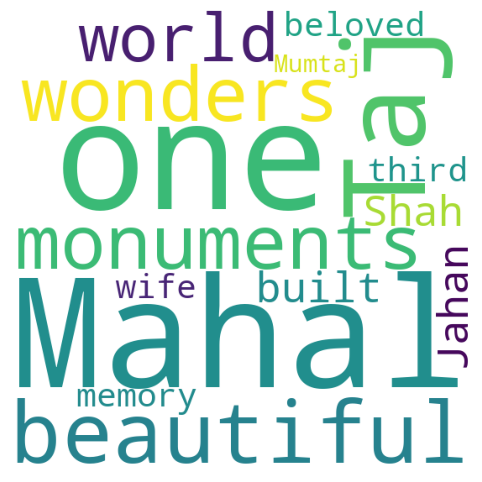

In [24]:
# importing all necessary modules
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopword_list = set(STOPWORDS)

paragraph="""Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

word_cloud = WordCloud(width = 550, height = 550,
                       background_color ='white',
                       stopwords = stopword_list,
                       min_font_size = 10).generate(paragraph)

# Visualize the WordCloud Plot

# Set wordcloud figure size
plt.figure(figsize = (8, 6))
# Show image
plt.imshow(word_cloud)
# Remove Axis
plt.axis("off")
# show plot
plt.show()

## Sentiment Analysis using Text Classification
### Classification using Bag of Words (or TF)
#### Load the Dataset

In [25]:
# Import libraries
import pandas as pd

# read the dataset
copus_url = 'https://raw.githubusercontent.com/sharmaroshan/Amazon-Alexa-Reviews/master/amazon_alexa.tsv'
df=pd.read_csv(copus_url, sep='\t')

# Show top 5-records
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


#### Explore the dataset

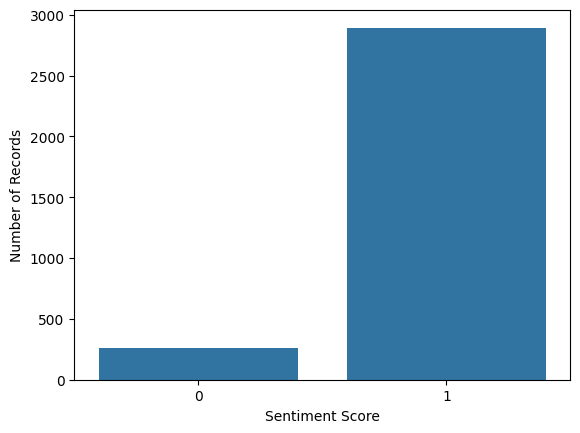

In [26]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='feedback', data=df) # 즉 피드백에서 긍정 피드백과 부정 피드백의 개수를 count

# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')

# Show the plot using show() function
plt.show()


#### Feature Generation using CountVectorizer

In [29]:
# Import CountVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer


# Create Regex tokenizer for removing special symbols and numeric values
# 정규표현식
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize CountVectorizer object
# 벡터화 시킨 후 모델을 학습
count_vectorizer = CountVectorizer(lowercase=True,
                     stop_words='english',
                     ngram_range = (1,1),
                     tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Split train and test set

In [30]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# sample data에서 train에 필요한 set과 test할 때 필요한 set을 분리
# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    count_vectors, df['feedback'], test_size=0.3, random_state=1)

#### Classification Model Building using Logistic Regression

In [32]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

#### Evaluate the Classification Model

In [33]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.9428571428571428
Logistic Regression Model Precision: 0.952433628318584
Logistic Regression Model Recall: 0.9873853211009175
Logistic Regression Model F1-Score: 0.9695945945945945


### Classification using TF-IDF

In [36]:
# Import TfidfVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
text_tfidf= tfidf.fit_transform(df['verified_reviews'])

In [37]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    text_tfidf, df['feedback'], test_size=0.3, random_state=1)

In [38]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

In [39]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Logistic Regression Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("Logistic Regression Model F1-Score:",f1_score(target_test, predictions))

Logistic Regression Model Accuracy: 0.9238095238095239
Logistic Regression Model Precision: 0.923728813559322
Logistic Regression Model Recall: 1.0
Logistic Regression Model F1-Score: 0.960352422907489


## Text Similarity

In [40]:
def jaccard_similarity(sent1, sent2):
    """Find text similarity using jaccard similarity"""

    # Tokenize sentences
    token1 = set(sent1.split())
    token2 = set(sent2.split())

    # intersection between tokens of two sentences
    intersection_tokens = token1.intersection(token2)

    # Union between tokens of two sentences
    union_tokens=token1.union(token2)

    # Cosine Similarity
    sim_= float(len(intersection_tokens) / len(union_tokens))
    return sim_

# Call function
jaccard_similarity('I love pets.','I hate pets.')

0.5

In [41]:
# Let's import text feature extraction TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

docs=['I love pets.','I hate pets.']

# Initialize TfidfVectorizer object
tfidf= TfidfVectorizer()

# Fit and transform the given data
tfidf_vector = tfidf.fit_transform(docs)

# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

# compute similarity using cosine similarity
cos_sim=cosine_similarity(tfidf_vector[0], tfidf_vector[1])
print(cos_sim)

[[0.33609693]]


In [42]:
# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Create documents 123123123
doc1 = nlp(u'I love pets.')
doc2 = nlp(u'I hate pets')

# Find similarity
print(doc1.similarity(doc2))

0.6362041590639654


<ipython-input-42-3d21f1b822d5>:9: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))


In [43]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 601.6 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [44]:
# Import spacy
import spacy

# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_lg')

# Create documents
doc1 = nlp(u'I love pets.')
doc2 = nlp(u'I hate pets')

# Find similarity
print(doc1.similarity(doc2))

0.9041243947777828




---


# [Assignment 1] Sentiment Analysis!
Try Sentiment Analysis by following suggenstions.
- Use Other dataset: [dataset list](https://research.aimultiple.com/sentiment-analysis-dataset/)
- Change your classifier: Other than `Logistic Regression`. [ref](https://www.kaggle.com/code/jeffd23/10-classifier-showdown-in-scikit-learn)
- Additional preprocessing: n-gram, stopwords [ref](https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0)

Will grade it only on and off. But briefly tell us what did you try.
- Using Amzaon datasets
- Change to RandomForestClassifier()
- Classification using TF-IDF

#### Load the Dataset

In [52]:
# Import libraries
import pandas as pd

# read the dataset
copus_url = 'https://raw.githubusercontent.com/sharmaroshan/Amazon-Alexa-Reviews/master/amazon_alexa.tsv'
df=pd.read_csv(copus_url, sep='\t')

# Show top 5-records
df.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


#### Explore the dataset

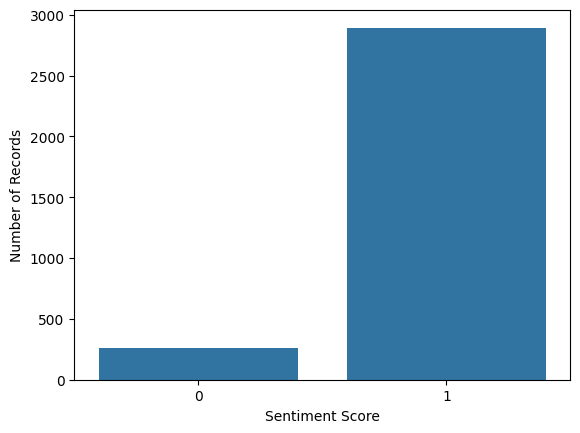

In [53]:
# Import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x='feedback', data=df)

# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')

# Show the plot using show() function
plt.show()


#### Feature Generation

In [58]:
# Import TfidfVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = regex_tokenizer.tokenize)

# Fit and transform the dataset
text_tfidf= tfidf.fit_transform(df['verified_reviews'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Split train and test set

In [59]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Partition data into training and testing set
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(
    count_vectors, df['feedback'], test_size=0.3, random_state=1)

#### Classification Model Building using Any Machine Learning Model

In [60]:
# import model from scikit-learn model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
model = RandomForestClassifier()

# fit the model with data
model.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = model.predict(feature_test)

#### Evaluate the Classification Model

In [61]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Assess model performance using accuracy measure
print("RandomForestClassifier Model Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("RandomForestClassifier Model Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("RandomForestClassifier Model Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("RandomForestClassifier F1-Score:",f1_score(target_test, predictions))

RandomForestClassifier Model Accuracy: 0.9407407407407408
RandomForestClassifier Model Precision: 0.9444444444444444
RandomForestClassifier Model Recall: 0.9942660550458715
RandomForestClassifier F1-Score: 0.9687150837988827
